In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler, Normalizer
from scipy.sparse import csr_matrix, csc_matrix
from scipy.sparse import save_npz
from scipy import sparse
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,RocCurveDisplay,confusion_matrix

In [2]:
df=pd.read_csv(r"/content/drive/MyDrive/df_malware_unido_solo_cat_y_escalar.csv")

In [15]:
df

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,anyo,mes,dia,hora,dia_semanal,Target
0,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,2018,5,9,15,2,0
1,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,0
2,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,0
3,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,2018,5,9,15,2,0
4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,192.168.1.195,123.0,89.221.210.188,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,2019,9,21,0,5,1
25010999,192.168.1.195,37306.0,102.165.48.81,17769.0,tcp,S1,0.0,ShAdDaT,8952.0,483602.0,9613.0,520116.0,2019,9,20,1,4,0
25011000,192.168.1.195,123.0,212.111.30.190,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,2019,9,21,0,5,1
25011001,192.168.1.195,123.0,5.1.56.123,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,2019,9,21,0,5,1


In [3]:
df["Target"]=df["Target"].apply(lambda x: 0 if x == "Malicious" else 1)

In [13]:
df.drop(["target"], axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25011003 entries, 0 to 25011002
Data columns (total 18 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id.orig_h      object 
 1   id.orig_p      float64
 2   id.resp_h      object 
 3   id.resp_p      float64
 4   proto          object 
 5   conn_state     object 
 6   missed_bytes   float64
 7   history        object 
 8   orig_pkts      float64
 9   orig_ip_bytes  float64
 10  resp_pkts      float64
 11  resp_ip_bytes  float64
 12  anyo           int64  
 13  mes            int64  
 14  dia            int64  
 15  hora           int64  
 16  dia_semanal    int64  
 17  Target         object 
dtypes: float64(7), int64(5), object(6)
memory usage: 3.4+ GB


In [9]:
df["history"].fillna("S", inplace=True) # ahora cero nulos

In [10]:
cat= ['proto','conn_state','id.resp_h', "id.orig_h","history"]
num=[  'missed_bytes', 'id.orig_p','id.resp_p','orig_pkts', 'orig_ip_bytes','resp_pkts', 'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora','dia_semanal']


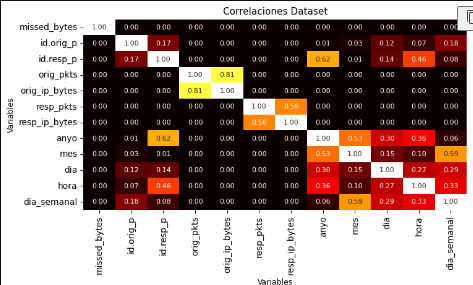

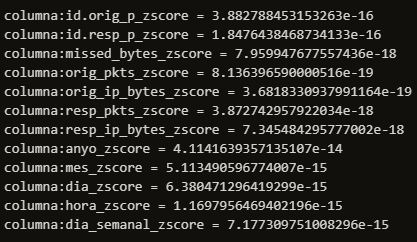

In [13]:
#ESTUDIANA CORRECLACION Y OUTLAYERS ELIMINAMOS
columns_correla_outlayers=["dia","resp_ip_bytes","orig_ip_bytes","id.orig_p","missed_bytes", "dia_semanal"]

In [14]:
df.drop(columns={"dia","resp_ip_bytes","orig_ip_bytes","id.orig_p","missed_bytes", "dia_semanal"}, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25011003 entries, 0 to 25011002
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id.orig_h   object 
 1   id.resp_h   object 
 2   id.resp_p   float64
 3   proto       object 
 4   conn_state  object 
 5   history     object 
 6   orig_pkts   float64
 7   resp_pkts   float64
 8   anyo        int64  
 9   mes         int64  
 10  hora        int64  
 11  Target      object 
dtypes: float64(3), int64(3), object(6)
memory usage: 2.2+ GB


In [29]:
# Cuenta la frecuencia de cada valor
frecuencias = df['id.orig_h'].value_counts()

unicos= df["id.orig_h"].unique()

print(f"Frecuencia {frecuencias} -- {unicos}")
print(len(unicos))

Frecuencia id.orig_h
192.168.1.196      10446132
192.168.100.111     6375629
192.168.1.195       3602157
192.168.1.200       3392003
192.168.100.103      994268
                     ...   
59.24.42.115              1
180.183.237.80            1
60.139.144.133            1
87.17.97.188              1
181.58.28.35              1
Name: count, Length: 21442, dtype: int64 -- ['192.168.100.103' '192.168.100.1' '122.152.1.198' ... '70.67.104.54'
 '184.103.250.171' '162.248.88.215']
21442


In [28]:
# Cuenta la frecuencia de cada valor
frecuencias = df['id.resp_h'].value_counts()


unicos= df["id.resp_h"].unique()

print(f"Frecuencia {frecuencias} -- {unicos}")
print(len(unicos))

Frecuencia id.resp_h
162.248.88.215     3578392
54.39.87.104       1008351
209.97.190.136      908544
216.18.168.16       268405
200.168.87.203       23295
                    ...   
114.51.206.213           1
145.189.161.124          1
124.242.130.41           1
32.50.65.157             1
75.152.33.156            1
Name: count, Length: 11654579, dtype: int64 -- ['65.127.233.163' '63.150.16.171' '111.40.23.49' ... '76.26.2.31'
 '172.58.99.9' '75.152.33.156']
11654579


vamos a eliminar la columna id.resp_H debido a la gran cantidad de valores unicos, evitando una excesiva complejidad, debido a las limitaciones informaticas

In [31]:
df.drop("id.resp_h", axis=1,  inplace=True)

In [32]:
df

,id.orig_h,id.resp_p,proto,conn_state,history,orig_pkts,resp_pkts,anyo,mes,hora,Target
0,192.168.100.103,23.0,tcp,S0,S,3.0,0.0,2018,5,15,Malicious
1,192.168.100.103,23.0,tcp,S0,S,1.0,0.0,2018,5,15,Malicious
2,192.168.100.103,23.0,tcp,S0,S,1.0,0.0,2018,5,15,Malicious
3,192.168.100.103,23.0,tcp,S0,S,3.0,0.0,2018,5,15,Malicious
4,192.168.100.103,23.0,tcp,S0,S,1.0,0.0,2018,5,15,Malicious
...,...,...,...,...,...,...,...,...,...,...,...
25010998,192.168.1.195,123.0,udp,SF,Dd,2.0,2.0,2019,9,0,Benign
25010999,192.168.1.195,17769.0,tcp,S1,ShAdDaT,8952.0,9613.0,2019,9,1,Malicious
25011000,192.168.1.195,123.0,udp,SF,Dd,2.0,2.0,2019,9,0,Benign
25011001,192.168.1.195,123.0,udp,SF,Dd,2.0,2.0,2019,9,0,Benign


mapeamos la target

In [34]:
df["Target"]= df["Target"].apply(lambda x: 0 if x == "Malicious" else 1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25011003 entries, 0 to 25011002
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id.orig_h   object 
 1   id.resp_p   float64
 2   proto       object 
 3   conn_state  object 
 4   history     object 
 5   orig_pkts   float64
 6   resp_pkts   float64
 7   anyo        int64  
 8   mes         int64  
 9   hora        int64  
 10  Target      int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.0+ GB


# REALIZAMOS EL ESCALADO

1. CATEGORICAS

In [38]:
df_cat=['id.orig_h','proto', 'conn_state', 'history']
df_num=['id.resp_p','orig_pkts','resp_pkts', 'anyo', 'mes', 'hora']
Target=["Target"]

In [42]:
df

,id.orig_h,id.resp_p,proto,conn_state,history,orig_pkts,resp_pkts,anyo,mes,hora,Target
0,192.168.100.103,23.0,tcp,S0,S,3.0,0.0,2018,5,15,0
1,192.168.100.103,23.0,tcp,S0,S,1.0,0.0,2018,5,15,0
2,192.168.100.103,23.0,tcp,S0,S,1.0,0.0,2018,5,15,0
3,192.168.100.103,23.0,tcp,S0,S,3.0,0.0,2018,5,15,0
4,192.168.100.103,23.0,tcp,S0,S,1.0,0.0,2018,5,15,0
...,...,...,...,...,...,...,...,...,...,...,...
25010998,192.168.1.195,123.0,udp,SF,Dd,2.0,2.0,2019,9,0,1
25010999,192.168.1.195,17769.0,tcp,S1,ShAdDaT,8952.0,9613.0,2019,9,1,0
25011000,192.168.1.195,123.0,udp,SF,Dd,2.0,2.0,2019,9,0,1
25011001,192.168.1.195,123.0,udp,SF,Dd,2.0,2.0,2019,9,0,1


In [43]:
df_ml=df.drop(["Target"], axis=1)

PARA RANDOMFOREST Y LOGISTICREGRESION - MINMAXSCALER

In [44]:
df_ml.isna().sum()

id.orig_h     0
id.resp_p     0
proto         0
conn_state    0
history       0
orig_pkts     0
resp_pkts     0
anyo          0
mes           0
hora          0
dtype: int64

In [45]:
one= OneHotEncoder()
df_4hot=one.fit_transform(df_ml)

In [46]:
df_4hot.shape

(25011003, 87527)

In [47]:
mix= MaxAbsScaler()
df_4hot_Mabs=mix.fit_transform(df_4hot)

In [49]:
df_4hot_Mabs.shape

(25011003, 87527)

PARA RED NEURONAL

In [51]:
df_rn= df.drop(["Target"], axis=1)

In [52]:
df_rn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25011003 entries, 0 to 25011002
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id.orig_h   object 
 1   id.resp_p   float64
 2   proto       object 
 3   conn_state  object 
 4   history     object 
 5   orig_pkts   float64
 6   resp_pkts   float64
 7   anyo        int64  
 8   mes         int64  
 9   hora        int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.9+ GB


In [53]:
one= OneHotEncoder()
df_4rn=one.fit_transform(df_rn)

In [54]:
normaliza=Normalizer()
df_4hot_7nor=normaliza.fit_transform(df_4rn)

In [55]:
df_4hot_7nor.shape

(25011003, 87527)

In [112]:
sparse_matrix=df_4hot_7nor

In [113]:
save_npz("/content/drive/MyDrive/df_malware_hot_mix_rn.npz",sparse_matrix)

RANDOMFOREST Y LOGISTIC REGRESION

In [56]:
X= df_4hot_Mabs
y=df["Target"]


In [57]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20008802, 87527)
(5002201, 87527)
(20008802,)
(5002201,)


In [59]:
# Definir el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79   5002063
           1       0.00      1.00      0.00       138

    accuracy                           0.65   5002201
   macro avg       0.50      0.82      0.39   5002201
weighted avg       1.00      0.65      0.79   5002201



In [60]:
importancia=model.feature_importances_

In [63]:
importancia.shape

(87527,)

In [69]:
df_4hot_Mabs_DD=pd.DataFrame.sparse.from_spmatrix(df_4hot_Mabs)

In [70]:
columnas=df_4hot_Mabs_DD.columns
df_importancia = pd.DataFrame({"importancia":importancia,"Columnas":columnas})

In [72]:
df_importancia

,importancia,Columnas
0,0.000000e+00,0
1,0.000000e+00,1
2,0.000000e+00,2
3,0.000000e+00,3
4,0.000000e+00,4
...,...,...
87522,4.396947e-05,87522
87523,6.718538e-07,87523
87524,1.056017e-04,87524
87525,2.132442e-04,87525


from matplotlib import pyplot as plt
df_importancia['importancia'].plot(kind='hist', bins=20, title='importancia')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_importancia['Columnas'].plot(kind='hist', bins=20, title='Columnas')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_importancia.plot(kind='scatter', x='importancia', y='Columnas', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Columnas']
  ys = series['importancia']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_importancia.sort_values('Columnas', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Columnas')
_ = plt.ylabel('importancia')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Columnas']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Columnas'}, axis=1)
              .sort_values('Columnas', ascending=True))
  xs = counted['Columnas']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_importancia.sort_values('Columnas', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Columnas')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_importancia['importancia'].plot(kind='line', figsize=(8, 4), title='importancia')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_importancia['Columnas'].plot(kind='line', figsize=(8, 4), title='Columnas')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [75]:
# Definir el modelo logisctic con C para regule el sobreajutes y la funcion sag q es adecuado con muchos datos
model = LogisticRegression(C=10, solver="sag")

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3245574
           1       1.00      1.00      1.00   1756627

    accuracy                           1.00   5002201
   macro avg       1.00      1.00      1.00   5002201
weighted avg       1.00      1.00      1.00   5002201



SUBMUESTREO DE LA CLASE MALICIOUS QYE ES LA MAYORITARIA PARA CONSEGUIR UN BALANCEO.- SE BALANCEA EL DATASET COMPLETO, DEJANDO LA TRAGET 50/50, PERO PERDIENDO UN 30% DE LOS DATOS

TECNICA SUBMUESTREO

In [81]:
# Aplica submuestro, para reducir el número de observaciones de todas las clases menos la clase minoritaria
X= df_4hot_Mabs
y=df["Target"]

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

#sampling_strategy="majority"#solo submuestre la clase mayoritaria

#ros = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
#X_resampled, y_resampled = ros.fit_resample(X, y)

print(y_resampled.value_counts())

Target
0    8780158
1    8780158
Name: count, dtype: int64


In [83]:
X_resampled.shape

(17560316, 87527)

In [91]:
y_resampled.shape

(17560316,)

In [93]:
X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14048252, 87527)
(3512064, 87527)
(14048252,)
(3512064,)


MODELO LOGISTICREGRESSION

In [94]:
# Definir el modelo logisctic con C para regule el sobreajutes y la funcion sag q es adecuado con muchos datos
model = LogisticRegression(C=10, solver="sag")

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1756117
           1       1.00      1.00      1.00   1755947

    accuracy                           1.00   3512064
   macro avg       1.00      1.00      1.00   3512064
weighted avg       1.00      1.00      1.00   3512064



MODELO RANDOMFOREST

In [95]:
# Definir el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98   1701701
           1       1.00      0.97      0.98   1810363

    accuracy                           0.98   3512064
   macro avg       0.98      0.98      0.98   3512064
weighted avg       0.98      0.98      0.98   3512064



RED NEURONAL

In [4]:
import tensorflow as tf
from tensorflow_datasets import datasets
from tensorflow.keras import regularizers
from keras.regularizers import l2
from keras.models import Sequential
from keras.optimizers import Adam
import pandas as pd
import numpy as np
from scipy import sparse
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


In [5]:
# Cargar la matriz dispersa
sparse_matrix = sparse.load_npz("/content/drive/MyDrive/df_malware_hot_mix_rn.npz")

In [6]:
sparse_matrix.shape

(25011003, 87527)

In [7]:
log_dir="/content/drive/MyDrive/lor_dir"

In [11]:
X=sparse_matrix
y= df["Target"]

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20008802, 87527)
(5002201, 87527)
(20008802,)
(5002201,)


In [13]:
sparse_matrix_y = sparse.csr_matrix(y_train)
y_train=sparse_matrix_y

In [14]:
def generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0

    while 1:

        X_batch = np.array(X_data[batch_size*counter:batch_size*(counter+1)].todense())
        y_batch = np.array(y_data[batch_size*counter:batch_size*(counter+1)].todense())
        counter += 1
        yield X_batch,y_batch

        #restart counter to yield data in the next epoch as well
        if counter >= number_of_batches:
            counter = 0


In [15]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [17]:
modelo = tf.keras.Sequential()
# Definir las 4 entradas

modelo.add(tf.keras.layers.Dense(units=32, activation='relu', input_shape=(87527,), kernel_regularizer=l2(0.01)))
modelo.add(tf.keras.layers.BatchNormalization())#mejora la tasa de parendizaje, evitando sobreajuste, ya que tb regulariza la funcion

# Capas ocultas
modelo.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=87527))
modelo.add(tf.keras.layers.BatchNormalization())

modelo.add(tf.keras.layers.Dropout(0.2))

modelo.add(tf.keras.layers.Dense(units=8, activation="elu"))
modelo.add(tf.keras.layers.BatchNormalization())

modelo.add(tf.keras.layers.Dense(units=4, activation='elu'))
modelo.add(tf.keras.layers.BatchNormalization())

# Capa de salida
modelo.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Se cambia a 2 unidades para representar las dos clases
#optimizador
"""optimizador= tf.keras.optimizers.SGD(learning_rate=0.005,
                                      momentum=0.9, #aporta inercia al proceso de optimizacion, acelerando la convergencia
                                      nesterov=True)# en True actualiza momentum demanera anticipada al gradiente, mejorando la estaboiilidad"""

optimizador=Adam( learning_rate=0.01, # rebajo el learning rate por ser mas adecuado para un ajuste fino aunque tarde mas
                    beta_1=0.6, # influye en el gradiente pasado (1 mas al gradiente y 0 nada)
                    beta_2=0.4, #influye en los cuadrados de los gradientes pasados(1 mas a la varianza y 0 nada)
                    epsilon=1e-09, #es para prevenior divisiones entre 0
                    amsgrad=False)#es una variante de Adam y ayuda con la convergencia de ambos a evitar oscilaciones de los pesos durante la optimizacion"""
"""optimizador = tf.keras.optimizers.Ftrl(
    l1_regularization_strength=0.0001,#penaliza los pesos con lasso
    l2_regularization_strength=0.000001,#penaliza con ridge, consiguiendo con ambos un proceso de actualziacion de pesosmejorado, evitando sobreajuste
    learning_rate_power=-0.5,#contola la rapidez de la tasa de aprendizaje con la que decae con el tiempo, indiviualemnte a cada parametro
    initial_accumulator_value=0.1,#valor inicial de acumulacion de gradientes
)"""

# Compilar el modelo
modelo.compile(optimizer=optimizador, loss="binary_crossentropy", metrics=['accuracy'])

#detniene el entrenamiento si la metrica no mejora
early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

#reduce la tasa de aprendizaje cuando el rendimiento del conj. val no mejora
reduce_lr_callbacks = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1)

#Guarda el modelo cuando mejora la métrica de validación
#filepath = r'D:\Cursos\REPOSITORIOS\DATASET\malware_total\logs\modelo.h5'
#monitor = 'val_loss'

#visionado_tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)


callbacks_list = [reduce_lr_callbacks, early_stopping_callbacks]

batch_size = 16
my_generator = generator(X_train, y_train, batch_size)
# Entrenar el modelo
historia = modelo.fit(my_generator, epochs=10, steps_per_epoch=X_train.shape[0]//batch_size,verbose=1,callbacks=callbacks_list)

Epoch 1/10
      1/1250550 [..............................] - ETA: 1152:48:32 - loss: 1.5386 - accuracy: 0.4628

InvalidArgumentError: Graph execution error:

Detected at node binary_crossentropy/logistic_loss/mul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-17-42d55fd83300>", line 60, in <cell line: 60>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2532, in binary_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5822, in binary_crossentropy

required broadcastable shapes
	 [[{{node binary_crossentropy/logistic_loss/mul}}]] [Op:__inference_train_function_5603]